### Metadata

This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

Columns:

- **Hours_Studied**: Number of hours spent studying per week.
- **Attendance**: Percentage of classes attended.
- **Parental_Involvement**: Level of parental involvement in the student's education (Low, Medium, High).
- **Access_to_Resources**: Availability of educational resources (Low, Medium, High).
- **Extracurricular_Activities**: Participation in extracurricular activities (Yes, No).
- **Sleep_Hours**: Average number of hours of sleep per night.
- **Previous_Scores**: Scores from previous exams.
- **Motivation_Level**: Student's level of motivation (Low, Medium, High).
- **Internet_Access**: Availability of internet access (Yes, No).
- **Tutoring_Sessions**: Number of tutoring sessions attended per month.
- **Family_Income**: Family income level (Low, Medium, High).
- **Teacher_Quality**: Quality of the teachers (Low, Medium, High).
- **School_Type**: Type of school attended (Public, Private).
- **Peer_Influence**: Influence of peers on academic performance (Positive, Neutral, Negative).
- **Physical_Activity**: Average number of hours of physical activity per week.
- **Learning_Disabilities**: Presence of learning disabilities (Yes, No).
- **Parental_Education_Level**: Highest education level of parents (High School, College, Postgraduate).
- **Distance_from_Home**: Distance from home to school (Near, Moderate, Far).
- **Gender**: Gender of the student (Male, Female).
- **Exam_Score**: Final exam score.

### Load Dataset

In [47]:
# import packages
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [48]:
dataset = pd.read_csv("StudentPerformanceFactors.csv", sep = ",", skipinitialspace=True)
dataset.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [49]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  6607
#Features =  20


### Filtering Missing Values

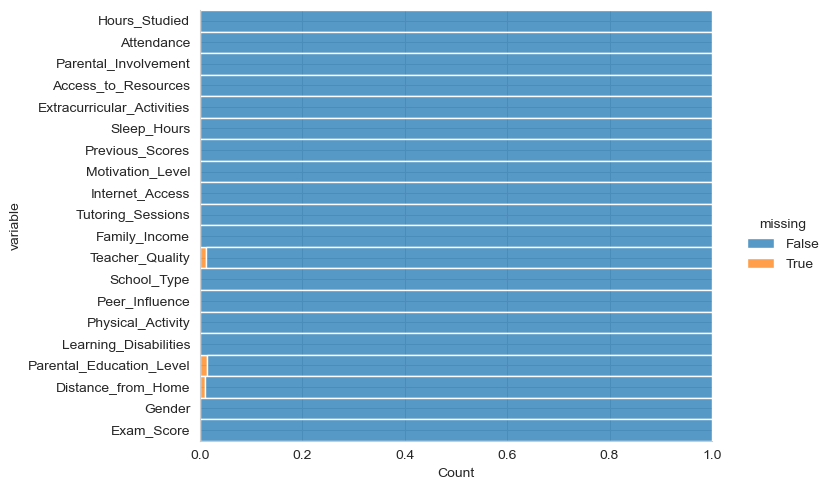

In [50]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [51]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  6378


### Descriptive Statistical Analysis

#### Numerical Variables

In [52]:
# list of numerical variables 
numerical_cols = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity", "Exam_Score"]

##### Histogram with Frequencies

In [53]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "pink", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.show()

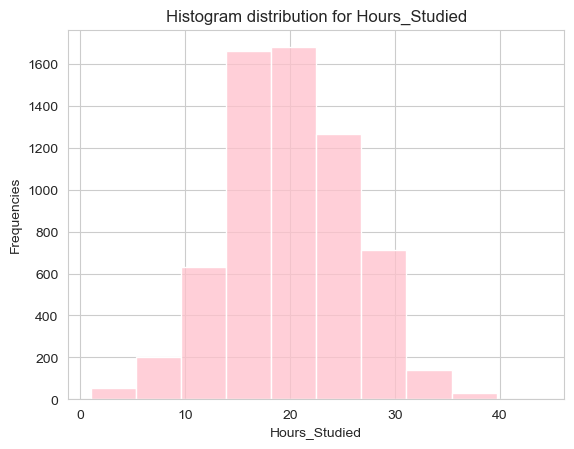

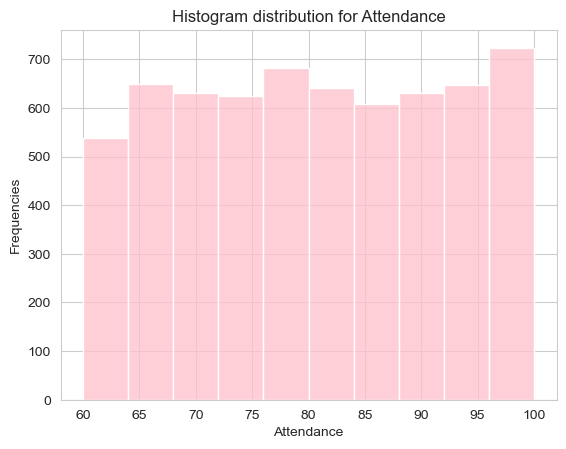

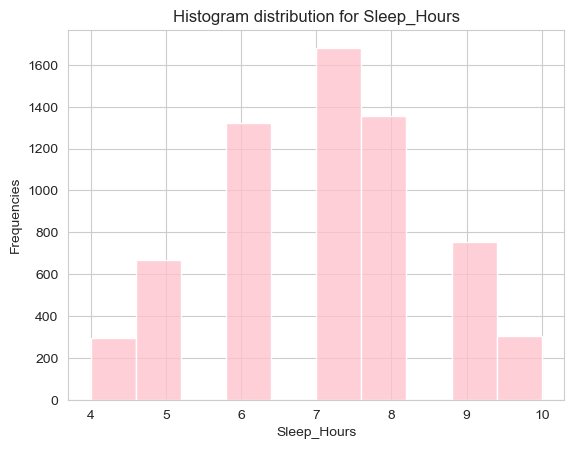

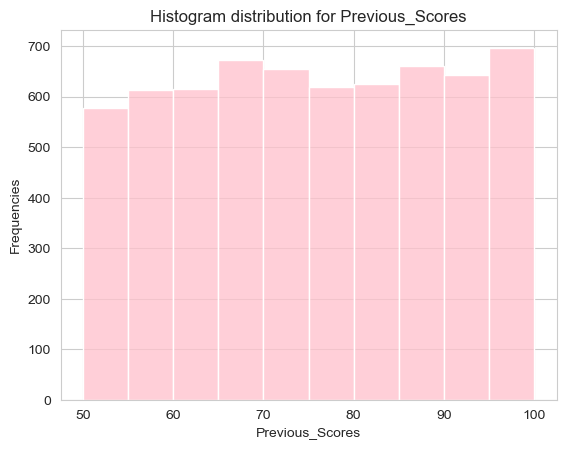

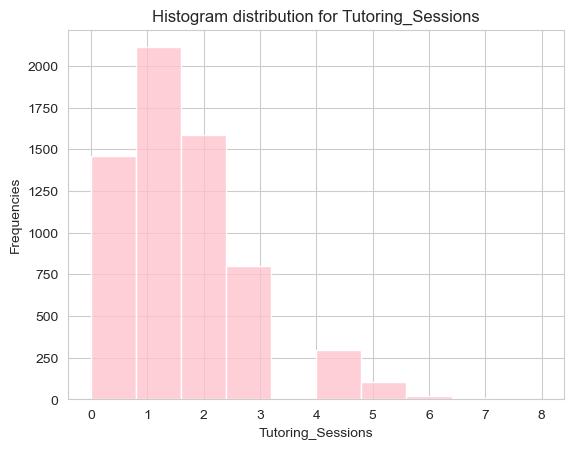

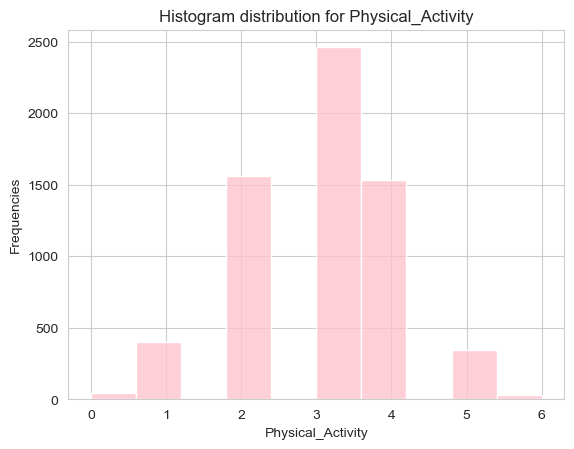

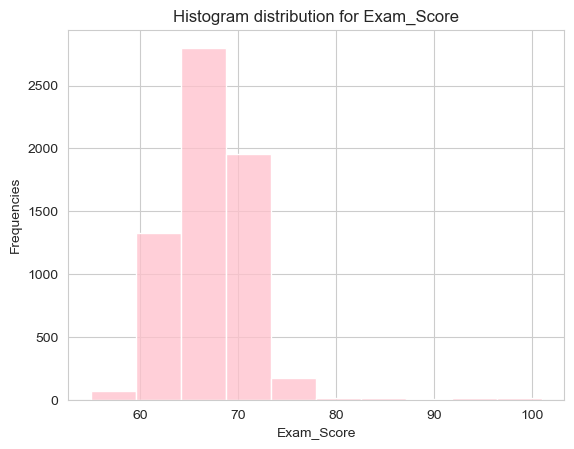

In [54]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

##### Interpretation
**Histogram Distribution for Hours_Studied**

The histogram shows that the distribution of hours studied per week among students is roughly bell-shaped, with a peak around 20 hours. Most students study between 10 and 30 hours, indicating a concentration of study hours in this range. Very few students study less than 5 hours or more than 35 hours, suggesting that extreme study habits are less common in this dataset. 

**Histogram Distribution for Attendance**

The histogram illustrates a relatively even distribution of attendance rates among students, ranging from 60% to 100%. The highest frequencies are observed in the 70-80% and 90-100% attendance ranges, indicating that most students maintain a high level of attendance. 

**Histogram Distribution for Sleep_Hours**

The histogram displays a distribution of sleep hours among students, with the most common sleep duration centered around 6 to 7 hours per night. The peak frequency occurs at 7 hours, suggesting that this is the ideal sleep duration for most students. There is a noticeable drop in frequencies for both lower sleep hours (4-5 hours) and higher sleep hours (9-10 hours), indicating that such sleep patterns are less common. 

**Histogram Distribution for Previous_Scores**

The histogram illustrates a balanced distribution of previous exam scores, with frequencies fairly evenly spread across the range from 50 to 100. This indicates that students have a diverse range of academic performances in their previous exams. The lack of significant peaks or troughs suggests that there are no clear clusters of scores, reflecting a variety of performance levels. This diversity may imply varying levels of preparation and ability among students, which could impact their current academic performance.

**Histogram Distribution for Tutoring_Sessions**

The histogram depicts the distribution of tutoring sessions attended by students, showing a clear peak at zero sessions, indicating that many students do not participate in tutoring. The distribution tapers off as the number of tutoring sessions increases, with a smaller number of students attending one or two sessions. Very few students engage in three or more sessions. This suggests that tutoring is not a widespread practice among the students.

**Histogram Distribution for Physical_Activity**

The histogram illustrates the distribution of physical activity hours among students, with a notable peak at 3 hours per week, indicating that this is the most common level of physical activity. Frequencies decrease significantly for both lower (0-2 hours) and higher (4-6 hours) activity levels, suggesting that most students engage in moderate physical activity.

**Histogram Distribution for Exam_Score**

The histogram shows the distribution of exam scores, with a prominent peak around the 70-75 range. This suggests that most students score between 60 and 80 on their exams, indicating a tendency toward moderate academic performance. The distribution is left-skewed, with fewer students achieving scores above 80 and a noticeable drop-off beyond 90, highlighting that higher scores are less common. 

##### Histogram with Densities and KDE line (kernel density estimate)

The Kernel Density Estimator provides a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable:  
$$ \hat{f}(x; h) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - X_i) $$  
Where:  
* n: total number of data points
* $X_i$: observed data points
* $K_h$: kernel function scaled by the bandwidth h
$$ K_h(z) = \frac{1}{h} K\left(\frac{z}{h}\right) $$ 
* $K$: Gaussian Kernel  
$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

In [55]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.show()

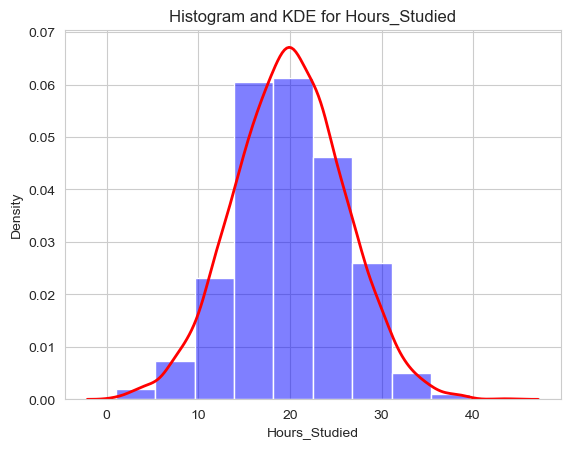

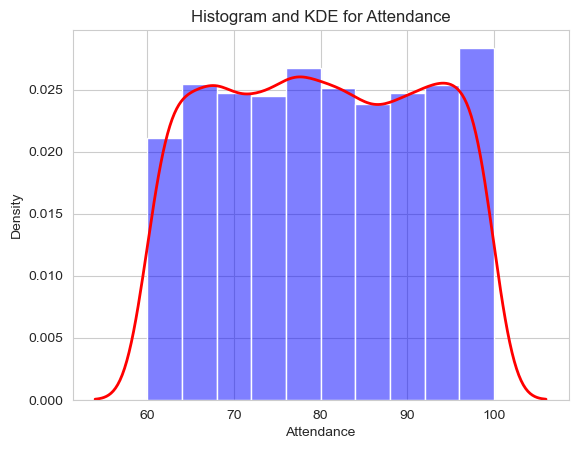

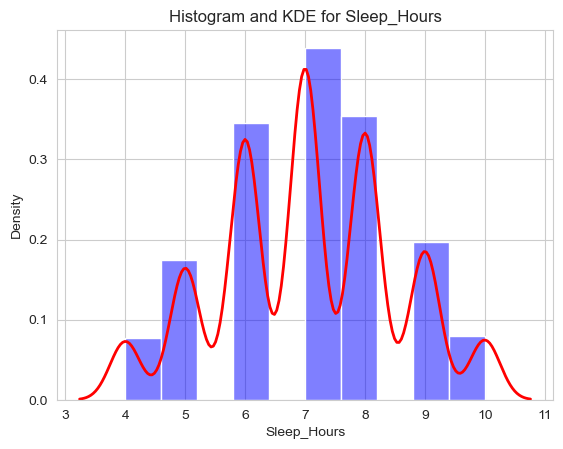

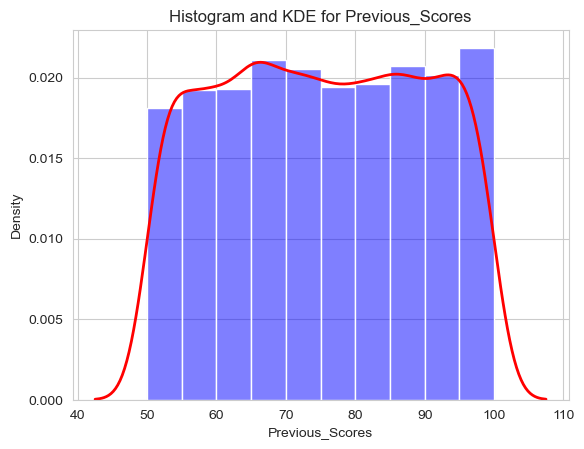

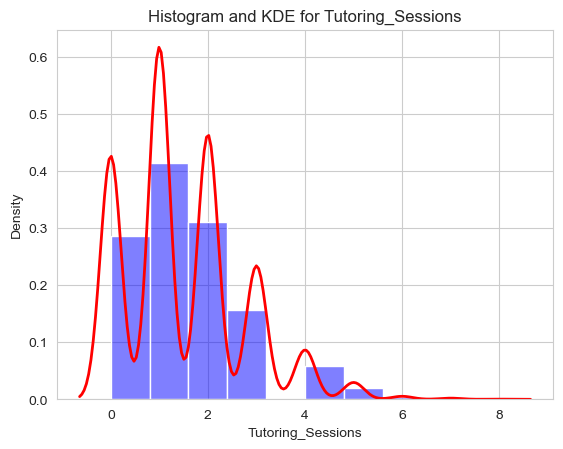

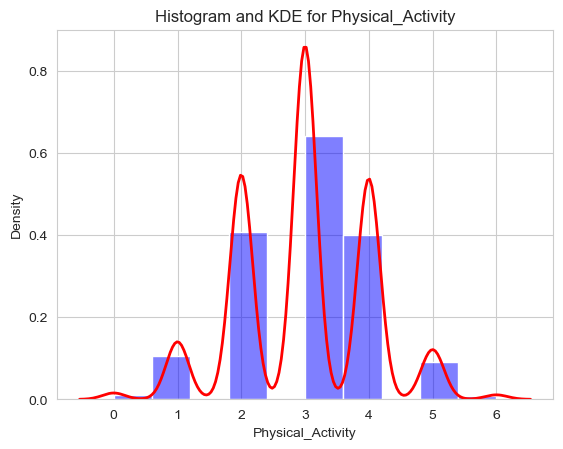

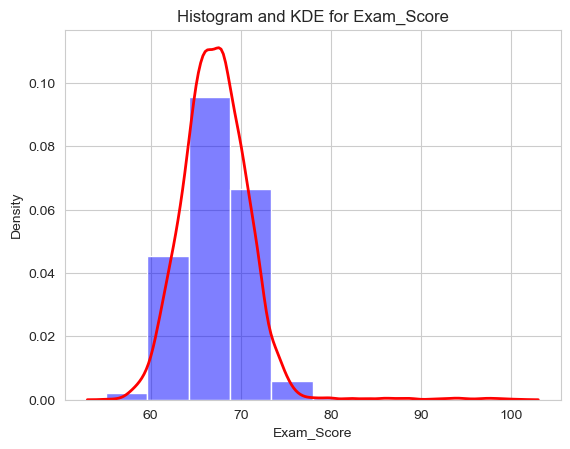

In [56]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

##### Interpretation

**Histogram and KDE for Hours Studied**

The histogram, along with the Kernel Density Estimate (KDE), indicates that most students tend to study between 15 and 25 hours per week, with a peak around 20 hours. The KDE line smooths out the distribution, reinforcing the concentration of study hours in this range. This suggests that a significant portion of students may be optimizing their study time around these hours, which could be associated with better academic performance.

**Histogram and KDE for Attendance**

The histogram and KDE illustrate that student attendance is fairly uniform across the range of 60% to 100%, with a slight peak around 80-90%. The smooth KDE indicates consistent attendance patterns, suggesting that most students prioritize class attendance. This high level of attendance likely contributes positively to their overall academic performance.

**Histogram and KDE for Sleep Hours**

The histogram and KDE reveal a multimodal distribution of sleep hours, with peaks around 6 and 8 hours. This suggests that students often alternate between these sleep patterns, which could reflect varying academic and lifestyle commitments. The presence of multiple peaks may indicate that both insufficient and sufficient sleep are common among students, highlighting a need for balanced sleep habits for optimal performance.

**Histogram and KDE for Previous Scores**

The histogram and KDE show that previous exam scores are distributed fairly evenly across the score range, with peaks around 60-70 and 80-90. This indicates a diverse performance level among students in prior assessments. The smooth KDE suggests that students have varying degrees of preparedness, which could influence their current academic performance.

**Histogram and KDE for Tutoring Sessions**

The histogram and KDE indicate that most students do not attend tutoring sessions, as evidenced by a peak at zero sessions. The distribution shows a gradual decline as the number of sessions increases, with a small number of students attending one or two sessions. This suggests that tutoring is not a common practice, potentially indicating a gap in academic support for many students.

**Histogram and KDE for Physical Activity**

The histogram and KDE illustrate a bimodal distribution of physical activity, with notable peaks at 2 and 4 hours per week. This indicates that students either engage in minimal or moderate levels of physical activity, reflecting differing lifestyle choices. The presence of these peaks suggests a potential divide in student engagement in physical health, which could impact their overall well-being and academic performance.

**Histogram and KDE for Exam Score**

The histogram and KDE show that exam scores are primarily clustered between 60 and 75, with a peak around 70. This left-skewed distribution indicates that while most students perform at a moderate level, higher scores (above 80) are less common. The distribution pattern may suggest that many students face challenges in achieving high scores, highlighting areas for potential academic support and improvement.

##### Box Plot

In [57]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

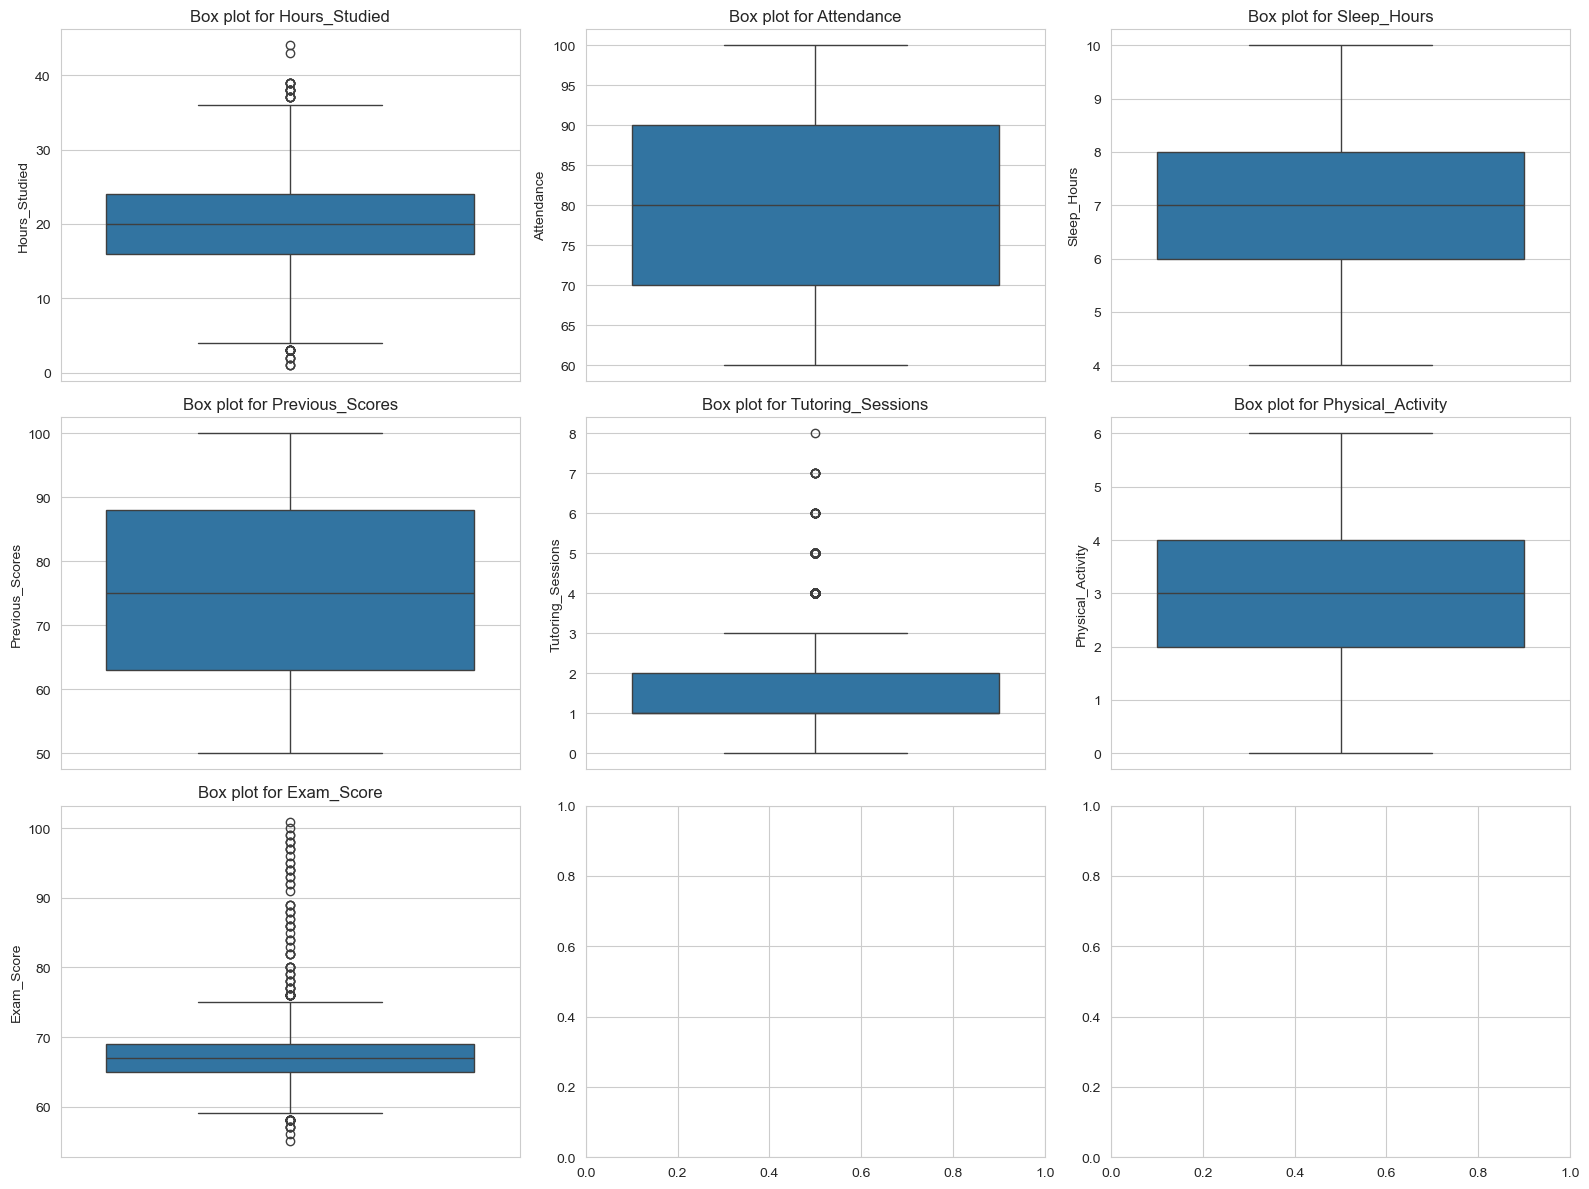

In [58]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

##### Interpretation

**Box Plot for Hours Studied**

The box plot shows the distribution of study hours among students, with the median around 20 hours. The interquartile range (IQR) indicates that 50% of students study between approximately 15 and 25 hours. There are several outliers on the upper end, indicating some students dedicate significantly more time to studying, while most students fall within a more moderate range.

**Box Plot for Attendance**

The box plot illustrates that student attendance is generally high, with a median attendance around 85%. The IQR suggests that 50% of students attend between 80% and 90% of classes. The lack of outliers indicates consistent attendance patterns among students, which may contribute positively to their academic outcomes.

**Box Plot for Sleep Hours**

The box plot shows that students typically get between 6 and 8 hours of sleep, with a median around 7 hours. The IQR suggests that most students maintain a healthy sleep duration, though there are some outliers indicating fewer students may either sleep less than 5 hours or more than 9 hours. This variability suggests that while many students achieve adequate sleep, there are those who may struggle with sleep.

**Box Plot for Previous Scores**

The box plot indicates that previous scores range from 50 to 100, with a median around 75. The IQR suggests that most students have prior scores between 70 and 80, indicating a generally moderate level of prior academic achievement. The presence of outliers on the upper end suggests that some students have significantly higher scores.

**Box Plot for Tutoring Sessions**

The box plot reveals that most students attend very few tutoring sessions, with a median of 1 session. The IQR indicates that most students attend between 0 and 2 sessions, while the presence of outliers suggests that a small number of students may attend significantly more sessions.

**Box Plot for Physical Activity**

The box plot shows that students engage in a moderate amount of physical activity, with a median around 3 hours per week. The IQR indicates that most students participate in between 2 to 4 hours of physical activity. The absence of outliers suggests a relatively consistent level of physical activity among students, reflecting a balance between academic and physical health.

**Box Plot for Exam Score**

The box plot illustrates that exam scores are primarily concentrated between 60 and 80, with a median score of around 70. The presence of outliers indicates that some students achieve significantly higher scores, while others score below the lower quartile. This suggests variability in student performance on exams, indicating a range of understanding and mastery of the material.

##### Statistical metrics

In [59]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


##### Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [60]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

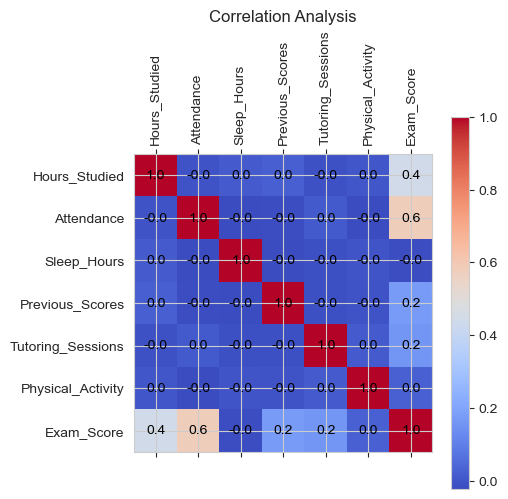

In [61]:
plot_correlation(dataset, numerical_cols)

##### Interpretation

**Hours Studied and Exam Score**: A moderate positive correlation (0.4) indicates that as study hours increase, exam scores tend to improve.

**Attendance and Exam Score**: A stronger positive correlation (0.6) suggests that higher attendance is associated with better exam performance, reinforcing the importance of regular class attendance.

**Sleep Hours and Exam Score**: No significant correlation is observed, implying that sleep duration may not directly influence exam performance.

**Previous Scores and Exam Score**: A weak positive correlation (0.2) indicates some connection between past performance and current exam results.

**Tutoring Sessions and Exam Score**: Also shows a weak positive correlation (0.2), suggesting that attending tutoring may have a small impact on scores.

**Physical Activity**: Displays no significant correlations with other variables, indicating that physical activity levels may not directly affect academic performance in this dataset.

##### Outliers detection using Z-Score

The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$

In [62]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

In [63]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile

In [64]:
call_percentile(z = -2)

2.275

In [65]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [66]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Hours_Studied ***
#samples outlier to distribution = 239
%outliers = 3.75 %

*** Outliers detection in Attendance ***
#samples outlier to distribution = 164
%outliers = 2.57 %

*** Outliers detection in Sleep_Hours ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in Previous_Scores ***
#samples outlier to distribution = 127
%outliers = 1.99 %

*** Outliers detection in Tutoring_Sessions ***
#samples outlier to distribution = 127
%outliers = 1.99 %

*** Outliers detection in Physical_Activity ***
#samples outlier to distribution = 75
%outliers = 1.18 %

*** Outliers detection in Exam_Score ***
#samples outlier to distribution = 265
%outliers = 4.15 %


In [67]:
outliers_detection(dataset, "Hours_Studied").head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
74,4,100,High,High,Yes,8,60,High,Yes,0,Medium,High,Private,Positive,4,No,College,Moderate,Male,69
113,35,99,High,High,Yes,7,85,Low,Yes,2,Medium,High,Private,Neutral,2,No,Postgraduate,Near,Female,79
125,33,70,Medium,Medium,Yes,6,82,Low,Yes,1,Low,High,Public,Neutral,4,No,College,Near,Male,69
179,36,71,Medium,Medium,Yes,6,56,Medium,Yes,2,High,Medium,Public,Positive,2,No,High School,Far,Male,69
209,43,86,High,Medium,Yes,7,97,Medium,Yes,2,Medium,High,Public,Positive,1,No,High School,Near,Female,78


In [68]:
outliers_detection(dataset, "Exam_Score").head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
16,14,60,Medium,Low,Yes,10,65,Low,Yes,0,High,Medium,Private,Positive,3,No,College,Near,Male,60
79,8,61,Medium,Medium,Yes,7,54,Medium,Yes,1,High,Medium,Public,Positive,3,No,College,Near,Male,60
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
106,31,100,Medium,Medium,No,7,59,Medium,Yes,2,High,High,Public,Positive,5,No,Postgraduate,Moderate,Male,76
113,35,99,High,High,Yes,7,85,Low,Yes,2,Medium,High,Private,Neutral,2,No,Postgraduate,Near,Female,79


#### Categorical Variables

In [69]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['Gender',
 'Distance_from_Home',
 'Learning_Disabilities',
 'Access_to_Resources',
 'Peer_Influence',
 'School_Type',
 'Teacher_Quality',
 'Family_Income',
 'Motivation_Level',
 'Internet_Access',
 'Extracurricular_Activities',
 'Parental_Education_Level',
 'Parental_Involvement']

In [70]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** Gender ******
Gender
Male      3688
Female    2690
Name: count, dtype: int64

***** Distance_from_Home ******
Distance_from_Home
Near        3801
Moderate    1941
Far          636
Name: count, dtype: int64

***** Learning_Disabilities ******
Learning_Disabilities
No     5710
Yes     668
Name: count, dtype: int64

***** Access_to_Resources ******
Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64

***** Peer_Influence ******
Peer_Influence
Positive    2553
Neutral     2495
Negative    1330
Name: count, dtype: int64

***** School_Type ******
School_Type
Public     4434
Private    1944
Name: count, dtype: int64

***** Teacher_Quality ******
Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64

***** Family_Income ******
Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64

***** Motivation_Level ******
Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, d

##### Bar chart - Analysis of absolute frequencies

In [71]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

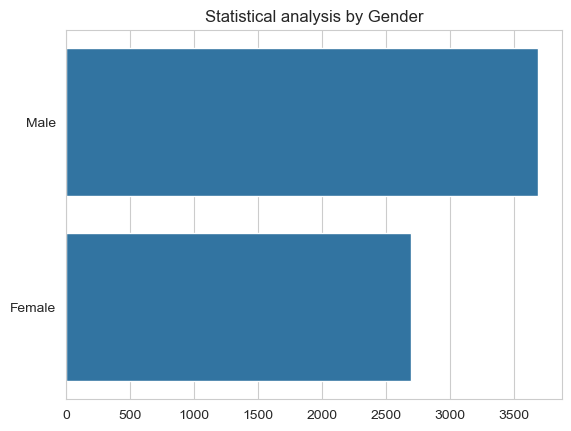

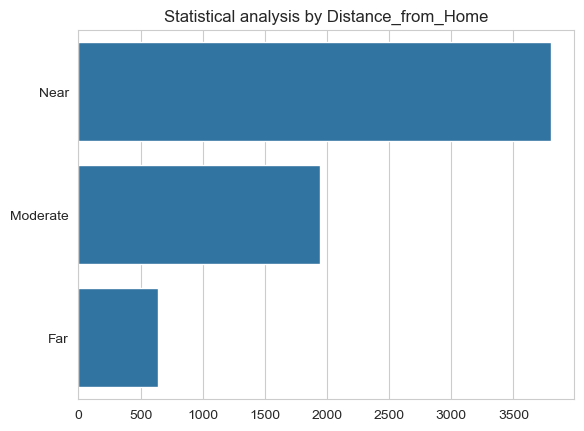

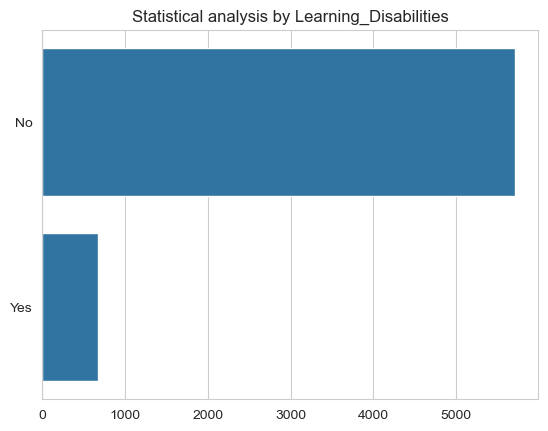

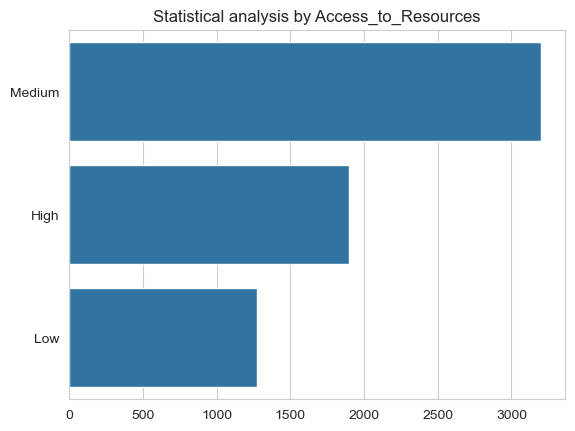

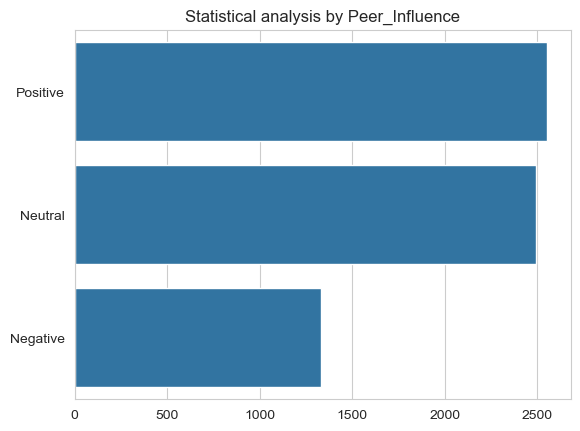

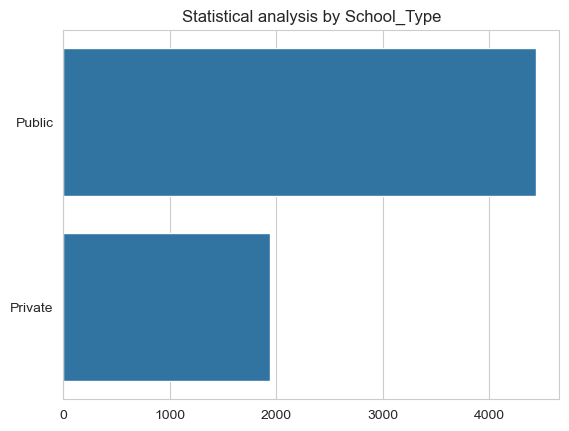

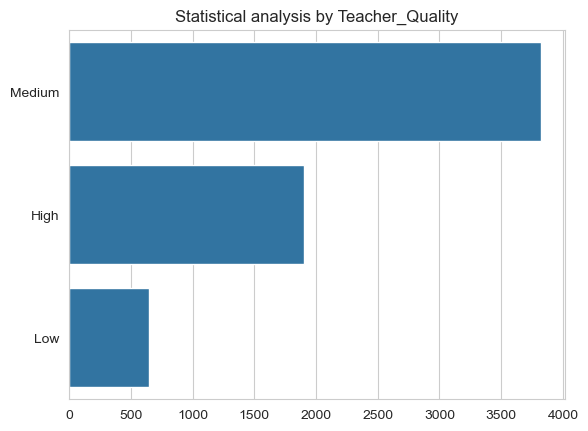

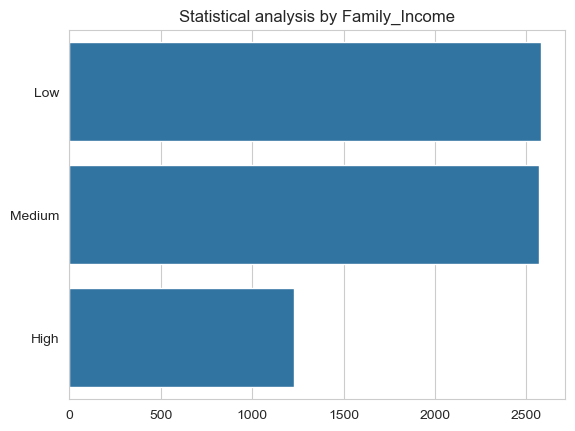

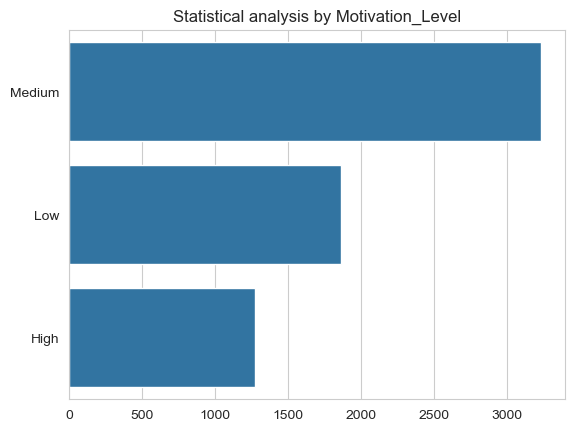

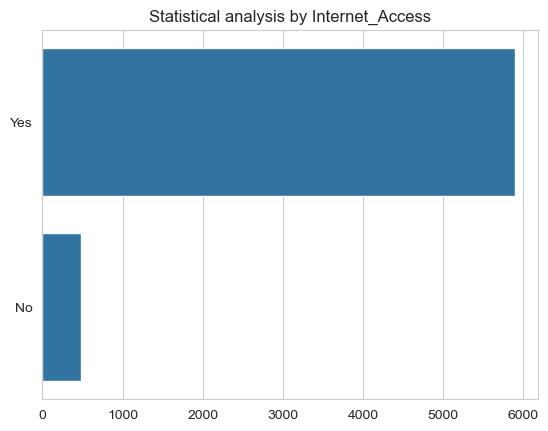

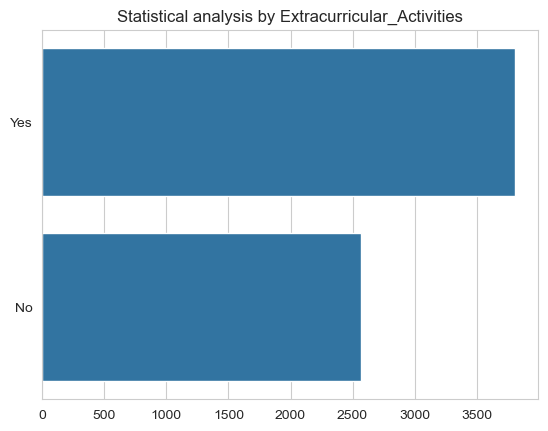

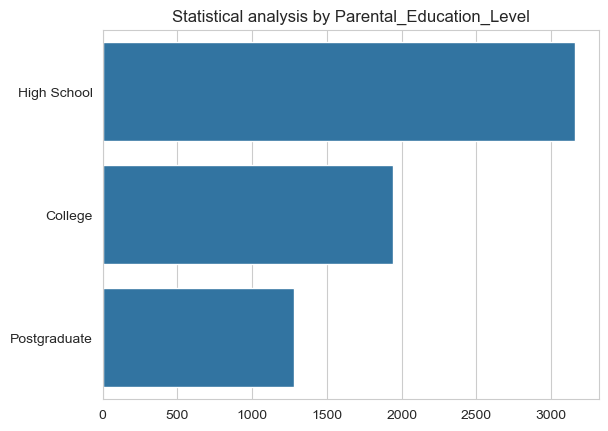

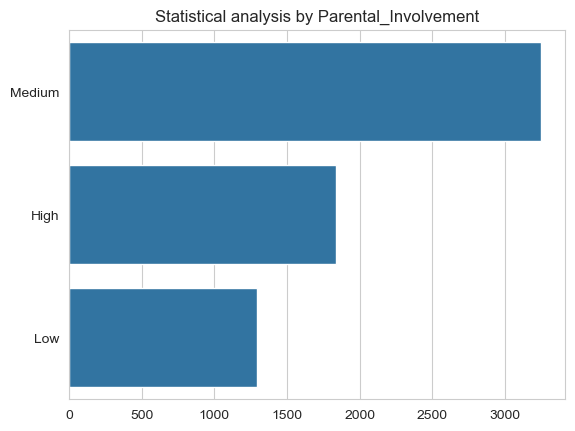

In [72]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

##### Interpretation

**Statistical Analysis by Gender**

The bar chart indicates a higher number of male students compared to female students in the dataset. This disparity may suggest gender-based differences in enrollment or participation, which could influence overall academic performance and engagement levels.

**Statistical Analysis by Distance from Home**

The bar chart shows that the majority of students live near their school, with a significant drop in numbers for those living a moderate or far distance. This could imply that proximity to school influences enrollment patterns and may affect students' attendance and engagement levels.

**Statistical Analysis by Learning Disabilities**

The bar chart indicates that a large majority of students do not have learning disabilities, suggesting that this group may be underrepresented in the dataset. Understanding the performance and needs of students with disabilities could provide insights into how to support diverse learners more effectively.

**Statistical Analysis by Access to Resources**

The chart shows that most students report having medium access to educational resources, with fewer indicating high or low access. This may reflect on the quality of educational support and the learning environment available to students, which can impact their academic performance.

**Statistical Analysis by Peer Influence**

The bar chart shows a predominance of positive peer influence among students, followed by neutral and negative influences. This suggests that most students are likely to be surrounded by supportive peers, which could enhance their motivation and engagement in academic activities.

**Statistical Analysis by School Type**

The bar chart indicates a higher enrollment in public schools compared to private schools, suggesting that public institutions may be more accessible or preferable for students in this dataset. This distinction could have implications for resource allocation and educational quality in different school types.

**Statistical Analysis by Teacher Quality**

The chart shows a majority of students rate teacher quality as medium, with fewer ratings of high or low quality. This distribution may indicate a need for improvement in teacher training and support to enhance educational outcomes for students.

**Statistical Analysis by Family Income**

The bar chart indicates that most students come from families with medium to low income, with fewer from high-income families. This distribution may reflect socioeconomic factors that can influence students' access to educational resources and support systems.

**Statistical Analysis by Motivation Level**

The chart shows a majority of students have a medium motivation level, with fewer students classified as high or low. This suggests that while many students are moderately motivated, there may be an opportunity to enhance motivation strategies to support academic achievement.

**Statistical Analysis by Internet Access**

The bar chart indicates that a significant number of students have access to the internet, while a smaller proportion do not. This access is crucial for academic success, especially in an increasingly digital learning environment, suggesting that those without internet may face challenges in their studies.

**Statistical Analysis by Extracurricular Activities**

The chart indicates that a majority of students participate in extracurricular activities, while a smaller number do not. Participation in these activities is often associated with enhanced social skills and academic performance, highlighting the importance of such opportunities for student development.

**Statistical Analysis by Parental Education Level**

The bar chart shows that most students' parents have completed high school, with fewer attaining college or postgraduate education. This pattern may reflect on the educational aspirations and support available for students, impacting their academic trajectories.

**Statistical Analysis by Parental Involvement**

The chart illustrates that most students experience medium parental involvement in their education, with fewer experiencing high or low involvement. This level of engagement may influence students' motivation and academic success, suggesting a need to foster greater parental participation.

##### Pie Chart - Analysis of relative frequencies

In [73]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

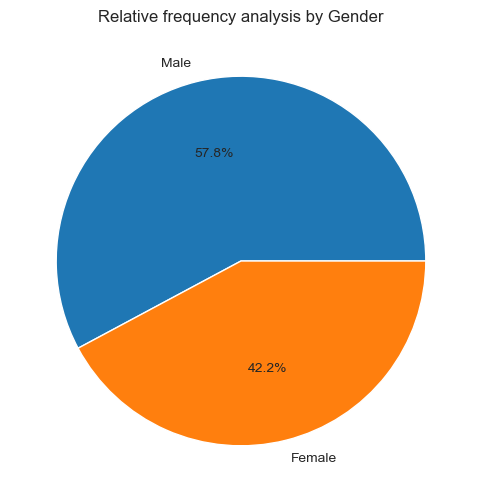

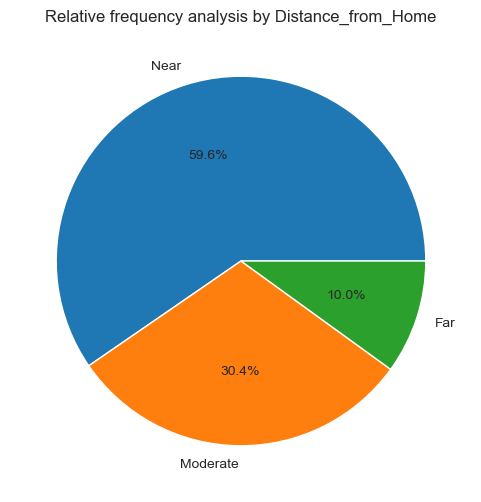

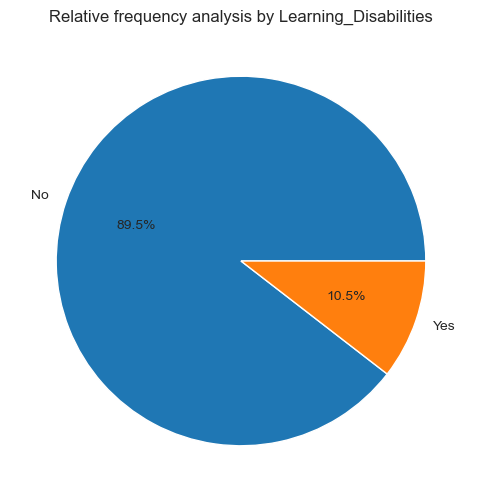

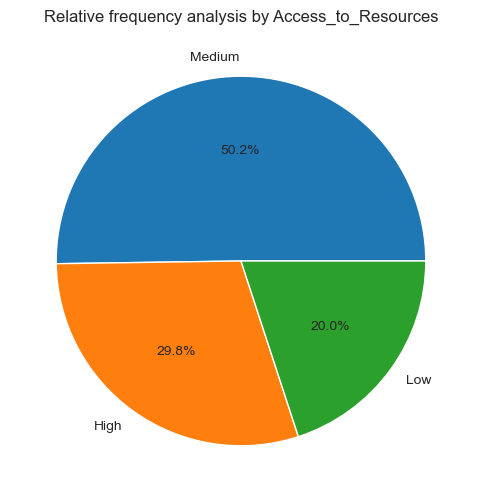

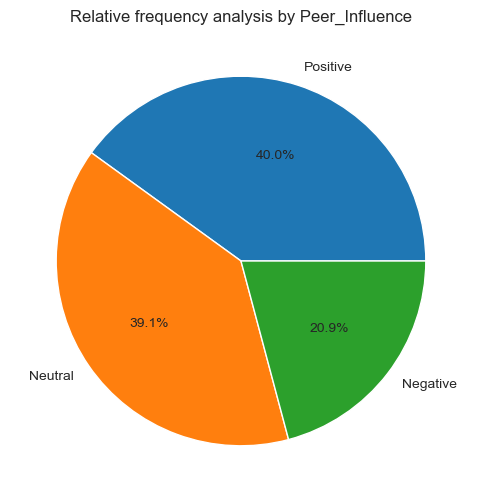

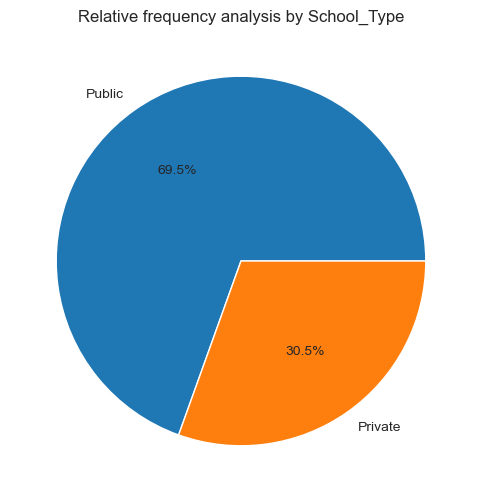

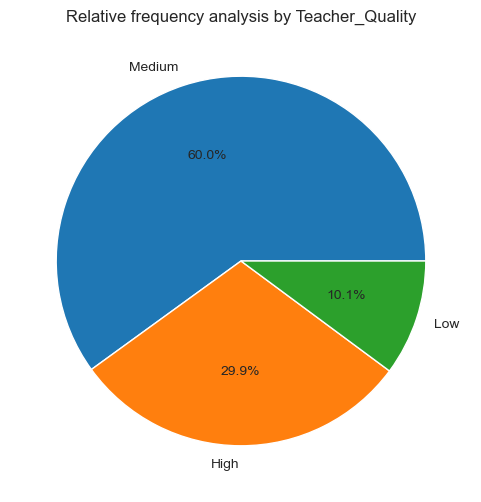

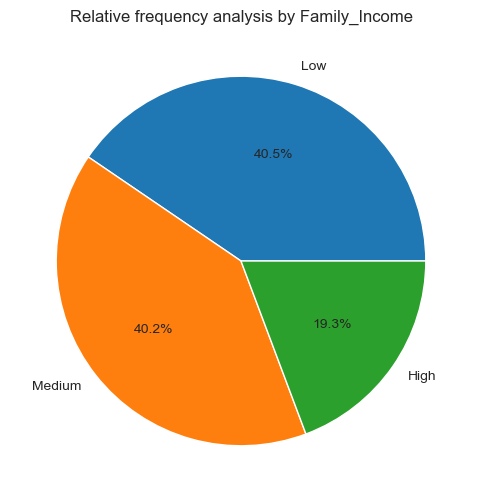

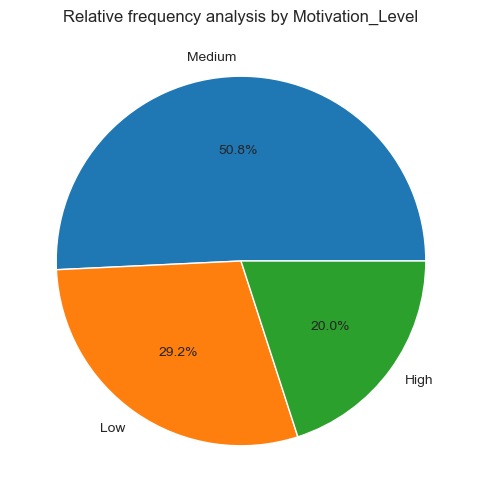

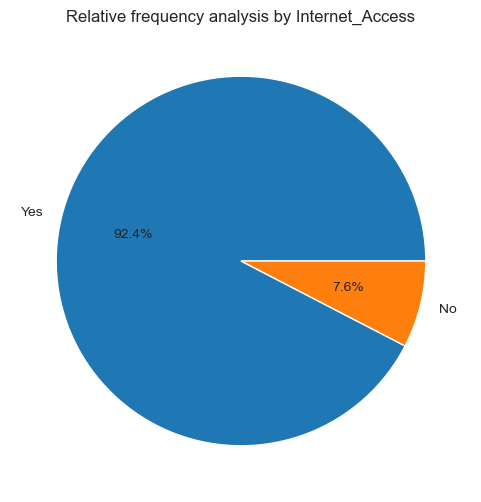

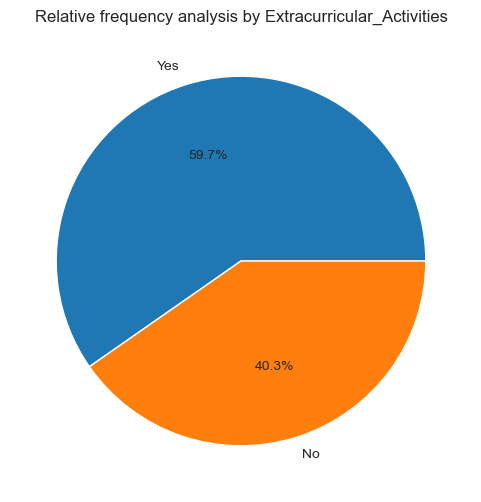

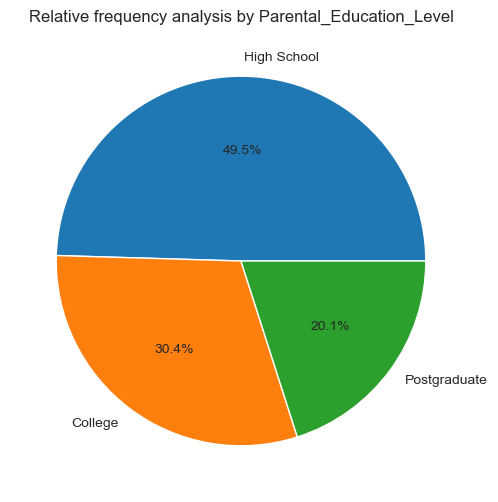

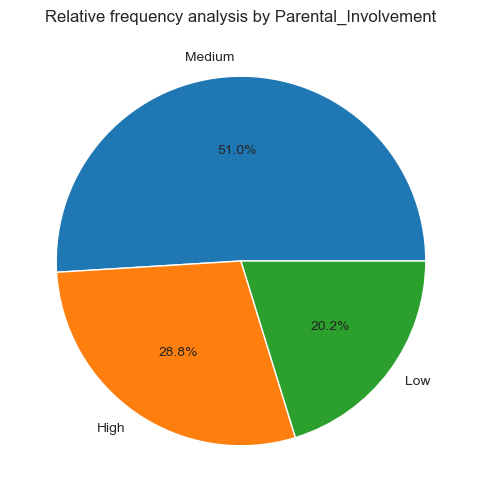

In [74]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

##### Interpretation

**Relative Frequency Analysis by Gender**

The pie chart shows that 57.8% of the student population is male, while 42.2% are female. This distribution indicates a higher representation of male students, which could influence overall classroom dynamics and engagement.

**Relative Frequency Analysis by Distance from Home**

The chart reveals that 59.6% of students live near the school, 30.4% live a moderate distance away, and only 10.0% live far from school. This suggests that proximity to school is a significant factor in student enrollment and attendance patterns.

**Relative Frequency Analysis by Learning Disabilities**

The pie chart shows that 89.5% of students do not have learning disabilities, while 10.5% do. This low percentage of students with learning disabilities may indicate that they are underrepresented in this dataset, highlighting a potential area for increased support and resources.

**Relative Frequency Analysis by Access to Resources**

The chart indicates that 50.2% of students have medium access to educational resources, followed by 29.8% with high access and 20.0% with low access. This distribution suggests that while many students have decent access to resources, there is still a significant portion that may require additional support.

**Relative Frequency Analysis by Peer Influence**

The pie chart indicates that 40.0% of students experience positive peer influence, while 39.1% are neutral and 20.9% report negative influence. This highlights that a majority of students are likely surrounded by supportive peers, which can enhance their motivation and academic engagement.

**Relative Frequency Analysis by School Type**

The chart shows that 69.5% of students attend public schools, while 30.5% attend private schools. This distribution suggests a preference or greater accessibility for public schooling options in the student population.

**Relative Frequency Analysis by Teacher Quality**

The pie chart illustrates that 60.0% of students rate teacher quality as medium, with 29.9% rating it as high and 10.1% as low. This suggests a general perception of adequacy in teaching quality but also indicates room for improvement in enhancing teacher effectiveness.

**Relative Frequency Analysis by Family Income**

The chart indicates a balanced distribution of family income levels, with 40.5% classified as low, 40.2% as medium, and 19.3% as high. This suggests that a significant portion of the student body comes from lower to middle-income families, which may influence their educational resources and opportunities.

**Relative Frequency Analysis by Motivation Level**

The chart shows that 50.8% of students have a medium motivation level, while 29.2% are classified as low and 20.0% as high. This indicates that while many students are moderately motivated, there is potential for developing strategies to enhance motivation among those who struggle.

**Relative Frequency Analysis by Internet Access**

The pie chart illustrates that a substantial majority of students (92.4%) have internet access, while only 7.6% do not. This high level of access is critical for academic success in a digital learning environment, suggesting that most students are well-equipped for online resources.

**Relative Frequency Analysis by Extracurricular Activities**

The chart indicates that 59.7% of students participate in extracurricular activities, while 40.3% do not. This suggests a strong engagement in additional activities beyond academics, which can foster social skills and personal development.

**Relative Frequency Analysis by Parental Education Level**

The pie chart shows that 49.5% of students have parents with a high school education, 30.4% with a college education, and 20.1% with postgraduate education. This distribution may reflect on the educational aspirations and support available to students, potentially influencing their academic outcomes.

**Relative Frequency Analysis by Parental Involvement**

The chart indicates that 51.0% of students experience medium parental involvement, with 28.8% reporting high involvement and 20.2% low involvement. This suggests that while many students receive adequate support from their parents, there is room for improvement in fostering greater engagement to enhance academic success.

##### Statistical Analysis for subgroups 

In [75]:
# create a group organized by motivation level and teacher quality
group = dataset.groupby(["Motivation_Level", "Teacher_Quality"]).size().reset_index(name = "samples")
print(group)

  Motivation_Level Teacher_Quality  samples
0             High            High      398
1             High             Low      132
2             High          Medium      747
3              Low            High      568
4              Low             Low      152
5              Low          Medium     1144
6           Medium            High      939
7           Medium             Low      363
8           Medium          Medium     1935


In [76]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Motivation_Level')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Motivation_Level and Teacher_Quality')
    plt.tight_layout()
    plt.show()

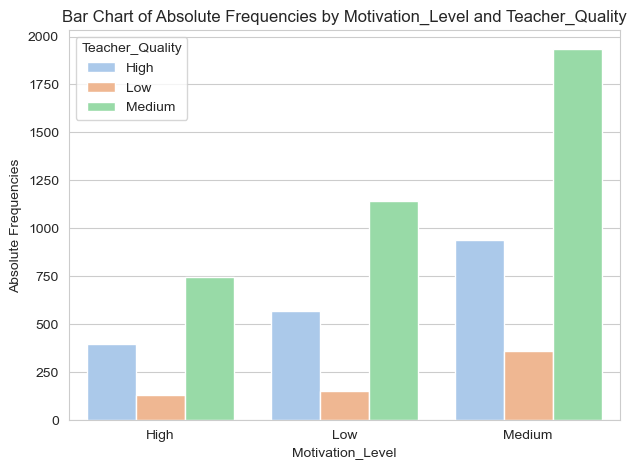

In [77]:
plot_absfreq_groups(group, "Motivation_Level", "Teacher_Quality")

In [78]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " motivation level with " + group[g2] + " teacher quality"
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Motivation_Level and Teacher_Quality')
    plt.show()

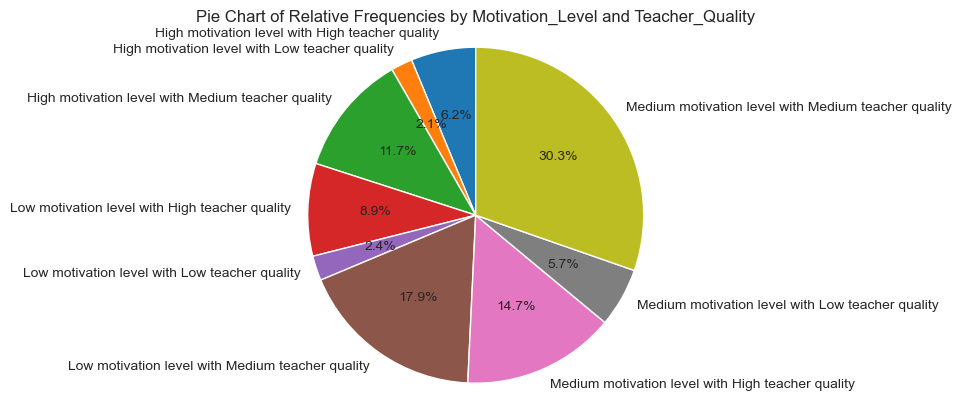

In [79]:
plot_relfreq_groups(group, "Motivation_Level", "Teacher_Quality")

##### Interpretation

**Bar Chart of Absolute Frequencies by Motivation Level and Teacher Quality**

The bar chart displays the absolute frequencies of students categorized by their motivation levels (high, low, medium) and corresponding teacher quality (high, low, medium). The data indicates that students with medium teacher quality have the highest representation across all motivation levels, particularly with medium motivation. This suggests that while many students benefit from adequate teacher support, there are opportunities to enhance the overall quality of teaching to improve student motivation and engagement.

**Pie Chart of Relative Frequencies by Motivation Level and Teacher Quality**

The pie chart presents the relative frequencies of various combinations of motivation levels and teacher quality. A significant portion of students falls into the categories of medium motivation with medium teacher quality (30.3%), medium motivation with high teacher quality (14.7%) and high motivation with medium teacher quality (11.7%). This indicates that a large number of students are receiving adequate support, but also suggests the need for strategies to boost motivation among those who are less engaged, especially those with low teacher quality.